# Leverage the Results from Part 2 and Explore the Results with Python

### Import libraries

In [1]:
import swat

import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import itertools

import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline 

### Create Connection

In [2]:
s = swat.CAS('CAS-Controller-34',5570)
s.sessionprop.setsessopt(caslib='public')

NOTE: 'Public' is now the active caslib.


+ Elapsed: 0.0165s, user: 0.0131s, sys: 0.0101s, mem: 1.16mb

### Examine available datasets

In [3]:
s.table.tableInfo()

,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,...,Global,Repeated,View,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,ERADMISSIONS,161067,49,0,utf-8,2018-09-20T09:47:06-04:00,2018-09-20T09:47:06-04:00,2018-09-20T12:51:58-04:00,UTF8,1.853070e+09,...,1,0,0,ERADMISSIONS.sashdat,Public,0,sas,,2018-08-15T17:57:44-04:00,1.849989e+09
1,READMISSIONS_FINAL,75675,40,0,utf-8,2018-09-20T12:57:14-04:00,2018-09-20T12:57:14-04:00,2018-09-20T13:05:12-04:00,UTF8,1.853082e+09,...,1,0,0,READMISSIONS_FINAL.sashdat,Public,0,sas,,2018-09-12T13:50:15-04:00,1.852394e+09
2,READ_PHYSICIAN_DEMO_DIM,95864,9,0,utf-8,2018-09-20T12:57:29-04:00,2018-09-20T12:57:30-04:00,2018-09-20T12:57:31-04:00,UTF8,1.853082e+09,...,1,0,0,READ_PHYSICIAN_DEMO_DIM.sashdat,Public,0,sas,,2018-09-12T13:42:41-04:00,1.852393e+09
3,HOSPITAL_READMISSIONS_DEMO_FACT,358431,26,0,utf-8,2018-09-20T12:57:35-04:00,2018-09-20T12:57:36-04:00,2018-09-20T12:57:42-04:00,UTF8,1.853082e+09,...,1,0,0,HOSPITAL_READMISSIONS_DEMO_FACT.sashdat,Public,0,sas,,2018-09-12T13:51:21-04:00,1.852394e+09
4,HOSPITAL_READMISSIONS_DEMO_ABT,107437,34,0,utf-8,2018-09-20T12:57:55-04:00,2018-09-20T12:57:56-04:00,2018-09-20T12:58:02-04:00,UTF8,1.853082e+09,...,1,0,0,HOSPITAL_READMISSIONS_DEMO_ABT.sashdat,Public,0,sas,,2018-09-12T13:50:27-04:00,1.852394e+09
5,HOSPITAL_READMISSIONS_ABT,358431,37,0,utf-8,2018-09-20T12:58:17-04:00,2018-09-20T12:58:19-04:00,2018-09-20T12:58:22-04:00,UTF8,1.853082e+09,...,1,0,0,HOSPITAL_READMISSIONS_ABT.sashdat,Public,0,sas,,2018-09-17T10:11:58-04:00,1.852813e+09
6,GRADBOOST_R_SCORED,22702,8,0,utf-8,2018-09-21T09:58:45-04:00,2018-09-21T09:59:15-04:00,2018-09-21T10:01:00-04:00,UTF8,1.853158e+09,...,1,0,0,,,0,sas,,,NaN
7,NN_R_SCORED,22702,11,0,utf-8,2018-09-21T10:00:40-04:00,2018-09-21T10:00:54-04:00,2018-09-21T10:10:07-04:00,UTF8,1.853158e+09,...,1,0,0,,,0,sas,,,NaN
8,GRADBOOST_PY_SCORED,22702,8,0,utf-8,2018-09-21T10:05:09-04:00,2018-09-21T10:06:13-04:00,2018-09-21T10:10:06-04:00,UTF8,1.853158e+09,...,1,0,0,,,0,sas,,,NaN
9,READMIT_IMP_GB_R_VALID,22702,8,0,utf-8,2018-09-21T13:14:56-04:00,2018-09-21T13:15:29-04:00,2018-09-21T13:18:35-04:00,UTF8,1.853169e+09,...,1,0,0,,,0,sas,,,NaN


### View 5 rows of SAS datasets from scored models

In [4]:
readmit_imp_gb_r_valid=s.CASTable('readmit_imp_gb_r_valid', vars={'readmit','_gbt_p_y'})
readmit_imp_nn_r_valid=s.CASTable('readmit_imp_nn_r_valid', vars={'readmit','_nn_p_y'})

In [5]:
readmit_imp_gb_r_valid_py=readmit_imp_gb_r_valid.to_frame()
readmit_imp_gb_r_valid_py.sample(5)

,_GBT_P_Y,READMIT
21000,0.976757,Y
16458,0.057138,N
5121,1.000000,Y
9880,0.130149,N
5167,0.013208,Y


In [6]:
readmit_imp_nn_r_valid_py=readmit_imp_nn_r_valid.to_frame()
readmit_imp_nn_r_valid_py.sample(5)

,READMIT,_NN_P_Y
20906,N,0.046642
14344,Y,0.578410
15819,N,0.007739
11365,N,0.222243
2903,N,0.136575


### Create a 0/1 indicator from \_GBT_P_Y and \_NN_P_Y

In [7]:
readmit_imp_gb_r_valid_py['_GBT_P_Y_BINARY']=np.where(readmit_imp_gb_r_valid_py['_GBT_P_Y']>=0.5,'Y','N')
readmit_imp_gb_r_valid_py.sample(5)

,_GBT_P_Y,READMIT,_GBT_P_Y_BINARY
11275,0.014160,N,N
1193,0.016422,N,N
10560,0.059466,N,N
729,0.987761,Y,Y
9837,0.006804,N,N


In [8]:
readmit_imp_nn_r_valid_py['_NN_P_Y_BINARY']=np.where(readmit_imp_nn_r_valid_py['_NN_P_Y']>=0.5,'Y','N')
readmit_imp_nn_r_valid_py.sample(5)

,READMIT,_NN_P_Y,_NN_P_Y_BINARY
8568,N,0.021731,N
22626,N,0.072655,N
7765,N,0.011799,N
20966,Y,0.997004,Y
16294,Y,0.066840,N


### Calculate the gradient boosting confusion matrix function from scikit learn

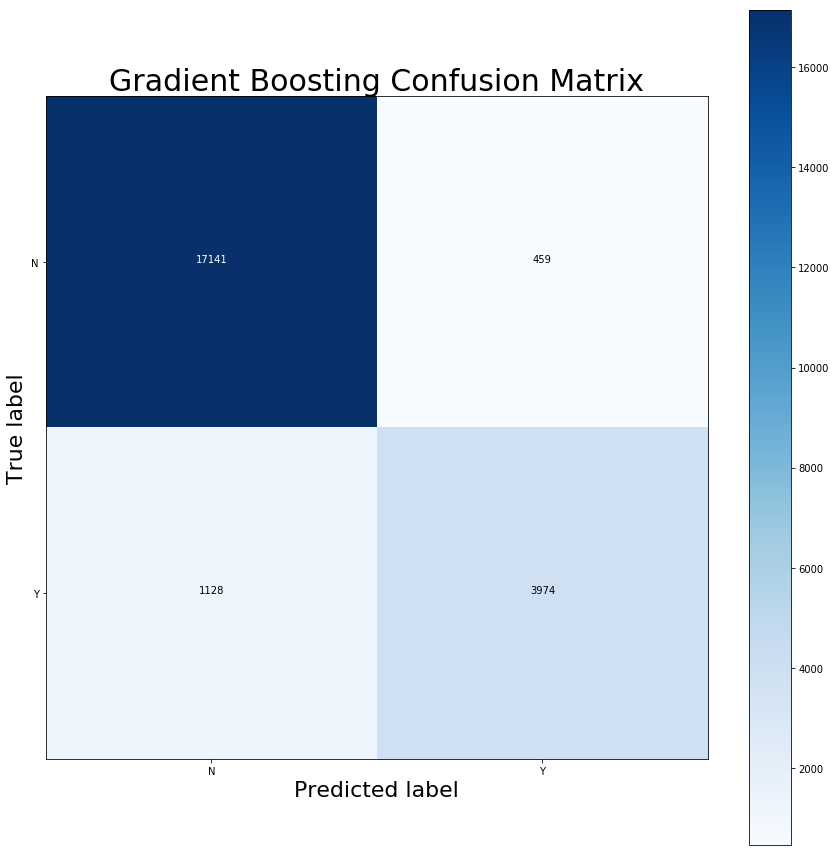

In [9]:
target_dict=['N','Y']
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(target_dict))
    plt.xticks(tick_marks, target_dict)
    plt.yticks(tick_marks, target_dict)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',fontsize=22)
    plt.xlabel('Predicted label',fontsize=22)

# Compute confusion matrix
cnf_matrix = confusion_matrix(readmit_imp_gb_r_valid_py['READMIT'], readmit_imp_gb_r_valid_py['_GBT_P_Y_BINARY'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(12,12))
plot_confusion_matrix(cnf_matrix, title='Gradient Boosting Confusion Matrix')
plt.show()

### Calculate the gradient boosting confusion matrix function from scikit learn

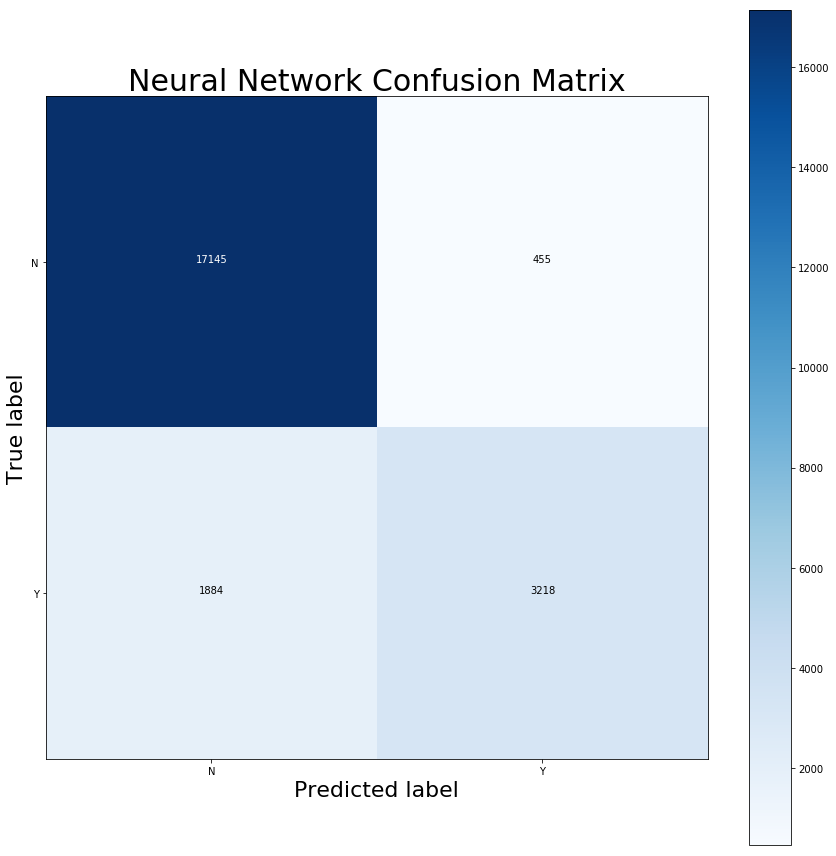

In [10]:
target_dict=['N','Y']
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(target_dict))
    plt.xticks(tick_marks, target_dict)
    plt.yticks(tick_marks, target_dict)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',fontsize=22)
    plt.xlabel('Predicted label',fontsize=22)

# Compute confusion matrix
cnf_matrix = confusion_matrix(readmit_imp_nn_r_valid_py['READMIT'], readmit_imp_nn_r_valid_py['_NN_P_Y_BINARY'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(12,12))
plot_confusion_matrix(cnf_matrix, title='Neural Network Confusion Matrix')
plt.show()

### Create ROC curve from validation data

#### Look at assessment data

In [11]:
readmit_imp_gb_r_assess_roc=s.CASTable('readmit_imp_gb_r_assess_roc')
readmit_imp_gb_r_assess_roc_py=readmit_imp_gb_r_assess_roc.to_frame()
readmit_imp_gb_r_assess_roc_py.head(15)

,_Column_,_Event_,_Cutoff_,_TP_,_FP_,_FN_,_TN_,_Sensitivity_,_Specificity_,_KS_,...,_FHALF_,_FPR_,_ACC_,_FDR_,_F1_,_C_,_GINI_,_GAMMA_,_TAU_,_MiscEvent_
0,_GBT_P_Y,Y,0.00,5102.0,17600.0,0.0,0.0,1.000000,0.000000,0.0,...,0.265979,1.000000,0.224738,0.775262,0.366998,0.952477,0.904953,0.919161,0.315355,0.775262
1,_GBT_P_Y,Y,0.01,4986.0,10138.0,116.0,7462.0,0.977264,0.423977,0.0,...,0.380042,0.576023,0.548322,0.670325,0.493029,0.952477,0.904953,0.919161,0.315355,0.451678
2,_GBT_P_Y,Y,0.02,4940.0,7243.0,162.0,10357.0,0.968248,0.588466,0.0,...,0.458818,0.411534,0.673817,0.594517,0.571594,0.952477,0.904953,0.919161,0.315355,0.326183
3,_GBT_P_Y,Y,0.03,4910.0,6285.0,192.0,11315.0,0.962368,0.642898,0.0,...,0.492162,0.357102,0.714695,0.561411,0.602565,0.952477,0.904953,0.919161,0.315355,0.285305
4,_GBT_P_Y,Y,0.04,4874.0,5322.0,228.0,12278.0,0.955312,0.697614,0.0,...,0.531099,0.302386,0.755528,0.521969,0.637207,0.952477,0.904953,0.919161,0.315355,0.244472
5,_GBT_P_Y,Y,0.05,4868.0,5084.0,234.0,12516.0,0.954136,0.711136,0.0,...,0.541973,0.288864,0.765748,0.510852,0.646738,0.952477,0.904953,0.919161,0.315355,0.234252
6,_GBT_P_Y,Y,0.06,4816.0,4070.0,286.0,13530.0,0.943944,0.768750,0.0,...,0.592432,0.231250,0.808123,0.458024,0.688590,0.952477,0.904953,0.919161,0.315355,0.191877
7,_GBT_P_Y,Y,0.07,4764.0,3472.0,338.0,14128.0,0.933751,0.802727,0.0,...,0.626084,0.197273,0.832173,0.421564,0.714350,0.952477,0.904953,0.919161,0.315355,0.167827
8,_GBT_P_Y,Y,0.08,4745.0,3247.0,357.0,14353.0,0.930027,0.815511,0.0,...,0.640005,0.184489,0.841247,0.406281,0.724759,0.952477,0.904953,0.919161,0.315355,0.158753
9,_GBT_P_Y,Y,0.09,4725.0,3069.0,377.0,14531.0,0.926107,0.825625,0.0,...,0.651221,0.174375,0.848207,0.393764,0.732785,0.952477,0.904953,0.919161,0.315355,0.151793


In [12]:
readmit_imp_nn_r_assess_roc=s.CASTable('readmit_imp_nn_r_assess_roc')
readmit_imp_nn_r_assess_roc_py=readmit_imp_nn_r_assess_roc.to_frame()
readmit_imp_nn_r_assess_roc_py.head(15)

,_Column_,_Event_,_Cutoff_,_TP_,_FP_,_FN_,_TN_,_Sensitivity_,_Specificity_,_KS_,...,_FHALF_,_FPR_,_ACC_,_FDR_,_F1_,_C_,_GINI_,_GAMMA_,_TAU_,_MiscEvent_
0,_NN_P_Y,Y,0.00,5102.0,17600.0,0.0,0.0,1.000000,0.000000,0.0,...,0.265979,1.000000,0.224738,0.775262,0.366998,0.919715,0.83943,0.851918,0.292522,0.775262
1,_NN_P_Y,Y,0.01,4992.0,11562.0,110.0,6038.0,0.978440,0.343068,0.0,...,0.349982,0.656932,0.485860,0.698441,0.461027,0.919715,0.83943,0.851918,0.292522,0.514140
2,_NN_P_Y,Y,0.02,4897.0,9138.0,205.0,8462.0,0.959820,0.480795,0.0,...,0.399807,0.519205,0.588450,0.651087,0.511783,0.919715,0.83943,0.851918,0.292522,0.411550
3,_NN_P_Y,Y,0.03,4826.0,7697.0,276.0,9903.0,0.945904,0.562670,0.0,...,0.437185,0.437330,0.648797,0.614629,0.547631,0.919715,0.83943,0.851918,0.292522,0.351203
4,_NN_P_Y,Y,0.04,4779.0,6918.0,323.0,10682.0,0.936691,0.606932,0.0,...,0.460493,0.393068,0.681041,0.591434,0.568962,0.919715,0.83943,0.851918,0.292522,0.318959
5,_NN_P_Y,Y,0.05,4726.0,6182.0,376.0,11418.0,0.926303,0.648750,0.0,...,0.484877,0.351250,0.711127,0.566740,0.590381,0.919715,0.83943,0.851918,0.292522,0.288873
6,_NN_P_Y,Y,0.06,4684.0,5603.0,418.0,11997.0,0.918071,0.681648,0.0,...,0.506378,0.318352,0.734781,0.544668,0.608747,0.919715,0.83943,0.851918,0.292522,0.265219
7,_NN_P_Y,Y,0.07,4643.0,5123.0,459.0,12477.0,0.910035,0.708920,0.0,...,0.525631,0.291080,0.754119,0.524575,0.624563,0.919715,0.83943,0.851918,0.292522,0.245881
8,_NN_P_Y,Y,0.08,4591.0,4726.0,511.0,12874.0,0.899843,0.731477,0.0,...,0.541775,0.268523,0.769315,0.507245,0.636799,0.919715,0.83943,0.851918,0.292522,0.230685
9,_NN_P_Y,Y,0.09,4553.0,4331.0,549.0,13269.0,0.892395,0.753920,0.0,...,0.560190,0.246080,0.785041,0.487506,0.651080,0.919715,0.83943,0.851918,0.292522,0.214959


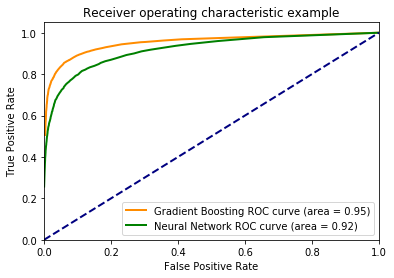

In [13]:
fpr_gb = readmit_imp_gb_r_assess_roc_py['_FPR_']
tpr_gb =readmit_imp_gb_r_assess_roc_py['_Sensitivity_']

fpr_nn = readmit_imp_nn_r_assess_roc_py['_FPR_']
tpr_nn =readmit_imp_nn_r_assess_roc_py['_Sensitivity_']

plt.figure()
lw = 2


plt.plot(fpr_gb, tpr_gb, color='darkorange',
         lw=lw, label='Gradient Boosting ROC curve (area = %0.2f)' % metrics.auc(fpr_gb,tpr_gb))

plt.plot(fpr_nn, tpr_nn, color='green',
         lw=lw, label='Neural Network ROC curve (area = %0.2f)' % metrics.auc(fpr_nn,tpr_nn))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Score NEW_PATIENTS with gradient boosting model

In [14]:
s.loadActionSet('decisionTree')
s.decisionTree.gbtreeScore(table='new_patients', 
                           copyVars={'City_Lat', 'City_Long','Hospital_LAT', 'Hospital_LONG', 'Hospital_Name', 
                                     'Hospital_State', 'diagnosis', 'Patient_Number', 'Admit_Date', 'NPI',
                                     'Length_of_Stay', 'Prior_IP_Admits', 'Chronic_Conditions_Number', 
                                     'Patient_Age', 'Order_Set_Used', 'Hospital_ID', 'Hospital_Address', 
                                     'Hospital_City', 'Hospital_Zip_Code', 'Hospital_County_Name', 'Hospital_Region', 
                                     'Total_Charges', 'Discharge_Notes', 'Patient_Gender', 'Urban_Class', 'Marital_Status',
                                     'Repeat_Care_Gap_Offenders', 'High_NA_ast_Discharge', 'bmi', 'CITY', 'STATE', 
                                     'Postcode', 'address', 'PatientID', 'Patient_LON', 'Patient_LAT', 'Contact_Preference',
                                     'Email', 'Phone',  'IM_Order_Set_Used', 'IM_Length_of_Stay', 
                                     'IM_Chronic_Conditions_Number', 'IM_Patient_Age'},
                           modelTable = {'caslib':'public', 'name':'readmit_imp_gb_R'},
                           casOut={'caslib':'public', 'name':'new_patients_scored'})

NOTE: Added action set 'decisionTree'.


[OutputCasTables]

    casLib                 Name   Rows  Columns  \
 0  Public  new_patients_scored  37838       47   
 
                                            casTable  
 0  CASTable('new_patients_scored', caslib='Public')  

[ScoreInfo]

                          Descr                             Value
 0  Number of Observations Read                             37838
 1  Number of Observations Used                                 0

+ Elapsed: 6.07s, user: 68.3s, sys: 3.65s, mem: 6.87e+03mb

In [15]:
new_patients_scored=s.CASTable('new_patients_scored')
new_patients_scored.head()

,STATE,diagnosis,Chronic_Conditions_Number,Admit_Date,Patient_LON,Patient_Gender,Hospital_LONG,Hospital_County_Name,Hospital_Address,City_Lat,...,Total_Charges,address,Hospital_ID,PatientID,Discharge_Notes,Postcode,_GBT_PredName_,_GBT_PredP_,_GBT_PredLevel_,_MissIt_
0,FL,AMI,2.0,2015-02-19,-80.237958,M,-80.25306,MARTIN,200 SE HOSPITAL AVE,27.19722,...,35600.04,912 HALL ST,9460.0,6.218143e+08,"ROUTINE DSCHG, HOME",34994.0,N,0.939031,0.0,NaN
1,FL,AMI,2.0,2015-03-03,-80.240814,M,-80.25306,MARTIN,200 SE HOSPITAL AVE,27.19722,...,16686.81,917 SE TARPON AVE,9460.0,6.134308e+09,"ROUTINE DSCHG, HOME",34994.0,N,1.000000,0.0,NaN
2,FL,COPD,2.0,2014-04-20,-80.241574,F,-80.25306,MARTIN,200 SE HOSPITAL AVE,27.19722,...,22464.54,801 NASSAU AVE,9460.0,1.269126e+09,DSCHG TO HOME HEALTH,34994.0,N,0.987742,0.0,NaN
3,FL,COPD,2.0,2016-02-29,-80.232220,M,-80.25306,MARTIN,200 SE HOSPITAL AVE,27.19722,...,18822.51,3051 SE LEXINGTON LAKES DR,9460.0,5.078039e+09,"ROUTINE DSCHG, HOME",33469.0,N,0.994441,0.0,NaN
4,FL,COPD,2.0,2014-07-22,-80.244988,M,-80.25306,MARTIN,200 SE HOSPITAL AVE,27.19722,...,10109.61,501 SE CHURCH ST,9460.0,9.168747e+09,"ROUTINE DSCHG, HOME",34994.0,N,0.981496,0.0,NaN


In [16]:
s.session.endsession()

+ Elapsed: 0.00776s, user: 0.00173s, sys: 0.0101s, mem: 0.848mb